In [39]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Select the load case
input_file = "Shear_and_Moment_6 Paddlers.csv" # or "Shear_and_Moment_2 Paddlers.csv"

script_dir = os.path.abspath('data')
file_path = os.path.join(script_dir, input_file)
info = pd.read_csv(file_path, header=None)

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import _canoeValues as cv

#-------------------Inputs-------------------------------------------------------------
script = "Longitudinal Analysis_6 Paddler.ipynb"
input_file = "Station Information.csv"
outerHull_file = "Outer Hull.csv" # Will be used for hydrostatic force and waterline calculation
# DLF = 1.25 # Dead Load Factor
# LLF = 1.5 # Live Load Factor
# pad_male = 163.28 # Weight of male padder (kg)
# pad_female = 68.03 # Weight of female paddler (kg)
# water_den = 1000 # Density of water = 1000 kg/m^3
#--------------------------------------------------------------------------------------

script_dir = os.path.abspath('data')# absolute file path in Jupyter
file_path = os.path.join(script_dir, input_file) # file path for the text file input
canoe_info = pd.read_csv(file_path, header=None)
statVol = canoe_info[1][1:]
statMass = canoe_info[2]

file_path = os.path.join(script_dir, outerHull_file) # file path for the text file input
out_coor = pd.read_csv(file_path, header=None)
x_out = out_coor[0]
y_out = out_coor[1]
z_out = out_coor[2]

station_no = x_out.nunique() # number of stations
station = x_out.unique() # location of each station

print(station_no)
print(station)

57
[   0.        102.678571  205.357143  308.035714  410.714286  513.392857
  616.071429  718.75      821.428571  924.107143 1026.785714 1129.464286
 1232.142857 1334.821429 1437.5      1540.178571 1642.857143 1745.535714
 1848.214286 1950.892857 2053.571429 2156.25     2258.928571 2361.607143
 2464.285714 2566.964286 2669.642857 2772.321429 2875.       2977.678571
 3080.357143 3183.035714 3285.714286 3388.392857 3491.071429 3593.75
 3696.428571 3799.107143 3901.785714 4004.464286 4107.142857 4209.821429
 4312.5      4415.178571 4517.857143 4620.535714 4723.214286 4825.892857
 4928.571429 5031.25     5133.928571 5236.607143 5339.285714 5441.964286
 5544.642857 5647.321429 5750.      ]


[179237.15866666666, 241341.64666666664, 266777.229, 283608.06799999997, 297237.5129999999, 309425.86733333336, 320723.6013333333, 331298.2253333333, 341202.304, 350455.97866666666, 359071.0003333333, 367057.32999999996, 374424.86, 381183.86066666665, 387345.1273333333, 392920.0726666666, 397920.81866666663, 402360.31033333327, 406252.4593333333, 409612.3339999999, 412456.412, 414802.93600000005, 416672.43700000003, 418088.5543333334, 419079.46233333333, 419680.7893333333, 419944.551, 419944.551, 419680.7893333333, 419079.46233333333, 418088.5543333334, 416672.43700000003, 414802.93600000005, 412456.412, 409612.3339999999, 406252.4593333333, 402360.31033333327, 397920.81866666663, 392920.0726666666, 387345.1273333333, 381183.86066666665, 374424.86, 367057.32999999996, 359071.0003333333, 350455.97866666666, 341202.304, 331298.2253333333, 320723.6013333333, 309425.86733333336, 297237.5129999999, 283608.06799999997, 266777.229, 241341.64666666664, 179237.15866666666]
[3943217.490666667, 5

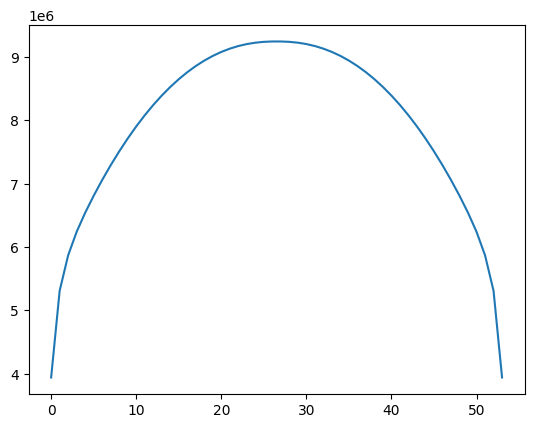

In [ ]:
#Thin Rectangle Torsion Analysis

J = []

# Loop through stations in outer hull
for k in range(1,station_no-2):

    # Coordinates of points in the outer frame sharing an X-coordinate with the current station
    X1_value = station[k]
    Y1 = []
    Z1 = []

    # Coordinates of points in the outer frame sharing an X-coordinate with the next station
    X2_value = station[k+1]
    Y2 = []
    Z2 = []

    # Loop through each x coordinate in the inner hull
    for i in range(0,len(x_out),1):

        # If the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        if x_out[i] == X1_value:
            Y1.append(y_out[i])
            Z1.append(z_out[i])

        # Otherwise, if the coordinate is aligned with the second station on the X-axis, store this XYZ coordinate
        elif x_out[i] == X2_value:
            Y2.append(y_out[i])
            Z2.append(z_out[i])

    # Now we have the coords of the outer station
    stationWidth = abs((max(Y1) + max(Y2))/2 - (min(Y1) + min(Y2))/2)
    stationDepth = abs((max(Z1) + max(Z2))/2 - (min(Z1) + min(Z2))/2)
    concretethickness = cv.concrete_thickness


    #LHS
    J_LHS = (stationDepth-concretethickness/2)*(concretethickness**3) # mm^4
    #Bottom
    J_Bottom = (stationWidth-concretethickness)*(concretethickness**3) # mm^4
    #RHS
    J_RHS = (stationDepth-concretethickness/2)*(concretethickness**3) # mm^4

    #Polar Moment of Inertia
    J.append((1/3)*(J_LHS+J_Bottom+J_RHS)) #mm^4

print(J)

T = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 630986.8465689991, 0, 0, 0, 0, 0, 0, 0, 0, 0]

torsionalStress = []
for i in range(1, station_no-2, 1):
    torsionalStress.append(T[i]/J[i-1] * concretethickness) # (N*mm / mm^4) * mm => N/mm^2

T_max_station = [0.2 * cv.compressive_strength * x * concretethickness for x in J] # N/mm^2 * mm^4 * mm = N*mm^3
print(T_max_station)

plt.plot(range(len(T_max_station)), T_max_station)
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.show()

# plt.plot(range(len(torsionalStress)), torsionalStress)
# plt.title('')
# plt.xlabel('x (stations)')
# plt.ylabel('(N/mm^2 = MPa)')
# plt.show()

# This script just prints values calculated in the load case script

In [41]:
# Positive Shear
value = float(info[1][1])
width = float(info[3][1])

torsion_resistance_positive = value * width/1000 # Nm
print("Tortional Resistance: " + str(torsion_resistance_positive) + " Nm")
print(width)

Tortional Resistance: 387.3378900845146 Nm
533.762456


In [42]:
# Negative Shear
value = float(info[1][2])
width = float(info[3][2])

torsion_resistance_negative = value * width/1000 # Nm
print("Tortional Resistance: " + str(torsion_resistance_negative) + " Nm")
print(width)

Tortional Resistance: -387.3378900845149 Nm
533.762456
